**кластеризатор КНП**


Евгений Борисов borisov.e@solarl.ru

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
from time import time
def get_seed(): t = time() ; return int(((t%1)/(t//1))*1e11)

In [3]:
from sklearn.datasets import make_moons

n_samples = 500
X, _ = make_moons(n_samples=n_samples, noise=.09, random_state=get_seed())


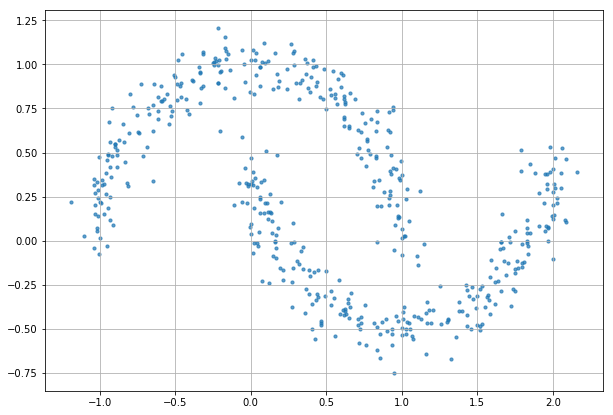

In [4]:
plt.figure(figsize=(10,7))
plt.scatter( x=X[:,0], y=X[:,1], s=10, alpha=0.7 )
plt.grid()
plt.show()

---

In [5]:
r = euclidean_distances(X) # матрица расстояний (Евклидова метрика)

In [6]:
# исключаем из поиска (маскируем) нулевую главную диагональ
rmask = np.zeros(r.shape)
rmask[ np.diag_indices(rmask.shape[0]) ] = np.inf

# пара точек и с наименьшим расстоянием
pair = np.unravel_index((r+rmask).argmin(), r.shape)
edge = [ pair ] 
dist = [ r[pair] ]

In [7]:
for i in range(r.shape[0]-2):
    # номера связанных вершин
    idx_node = set(sum(edge,()))
    # номера несвязанных вершин
    idx_node_nl = tuple(set(range(r.shape[0]))-idx_node)
    idx_node = tuple(idx_node) 
    
    rmask = np.zeros(r.shape)
    # исключаем из поиска (маскируем) главную диагональ
    rmask[ np.diag_indices(rmask.shape[0]) ] = np.inf
    # исключаем (маскируем) столбцы связанных точек
    rmask[:,idx_node] = np.inf
    # исключаем (маскируем) строки несвязанных точек
    rmask[idx_node_nl,:] = np.inf

    # номера точек связаной и несвязанной с наименьшим расстоянием
    pair = np.unravel_index((r+rmask).argmin(), r.shape)
    edge.append(pair)
    dist.append(r[pair])

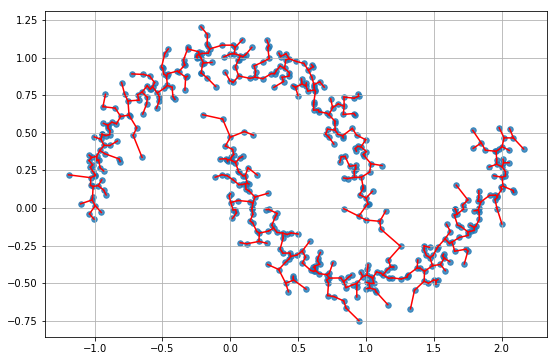

In [8]:
# рисуем полный граф
edge_points = [ [ [ X[n1,0],X[n2,0] ], [ X[n1,1],X[n2,1] ] ] for n1,n2 in edge ]

plt.figure(figsize=(9,6))
plt.scatter( x=X[:,0], y=X[:,1], s=30, alpha=0.8 )
for p in edge_points: plt.plot( p[0], p[1], c='r' )
plt.grid()
#plt.savefig('res-knp-1.png')
plt.show()

---

In [9]:
k=2 #  удаляем k самых длинных ребер

idx_pair = np.argsort(dist)[::-1] # номера ребер в порядке убывания длинны
edge_split = [ edge[i] for i in idx_pair[k:] ] # обрезаный список ребер

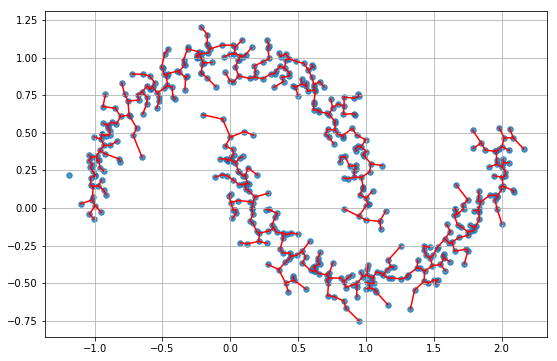

In [10]:
# рисуем разделённый граф
edge_points = [ [ [ X[n1,0],X[n2,0] ], [ X[n1,1],X[n2,1] ] ] for n1,n2 in edge_split ]
plt.figure(figsize=(9,6))
plt.scatter( x=X[:,0], y=X[:,1], s=30, alpha=0.8 )
for p in edge_points: plt.plot( p[0], p[1], c='r' )
plt.grid()
#plt.savefig('res-knp-2.png')
plt.show()

In [ ]:
# обойти графы, разобрать точки на кластеры
# оценить качество кластеризации

In [ ]:
# # матрица инциндентности
# g = np.zeros(r.shape)
# for p in edge_split: g[p]=1